In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [13]:
 file_path = '/content/dermatology_database_1.csv'
data = pd.read_csv(file_path)
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['age'] = data['age'].fillna(data['age'].median())

In [5]:
X = data.drop(columns=['class'])
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy on original data: {svm_accuracy}")

SVM Accuracy on original data: 0.7297297297297297


In [21]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy on original data: {rf_accuracy}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy on original data: 0.9864864864864865
Random Forest Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



In [22]:
#Remove outliers and re-train SVM, RF
z_scores = np.abs(zscore(X))
threshold = 3
outliers_removed = (z_scores < threshold).all(axis=1)

data_cleaned = data[outliers_removed]
X_cleaned = data_cleaned.drop(columns=['class'])
y_cleaned = data_cleaned['class']

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42
)

In [20]:
# Train SVM on cleaned data
svm_model_cleaned = SVC(random_state=42)
svm_model_cleaned.fit(X_train_cleaned, y_train_cleaned)
y_pred_svm_cleaned = svm_model_cleaned.predict(X_test_cleaned)
svm_accuracy_cleaned = accuracy_score(y_test_cleaned, y_pred_svm_cleaned)
print(f"SVM Accuracy after removing outliers: {svm_accuracy_cleaned}")

SVM Accuracy after removing outliers: 0.6538461538461539


In [10]:
# Train Random Forest on cleaned data
rf_model_cleaned = RandomForestClassifier(random_state=42)
rf_model_cleaned.fit(X_train_cleaned, y_train_cleaned)
y_pred_rf_cleaned = rf_model_cleaned.predict(X_test_cleaned)
rf_accuracy_cleaned = accuracy_score(y_test_cleaned, y_pred_rf_cleaned)
print(f"Random Forest Accuracy after removing outliers: {rf_accuracy_cleaned}")
print("Random Forest Classification Report (Cleaned Data):")
print(classification_report(y_test_cleaned, y_pred_rf_cleaned))

Random Forest Accuracy after removing outliers: 0.9423076923076923
Random Forest Classification Report (Cleaned Data):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       0.86      0.75      0.80         8
           3       1.00      1.00      1.00        13
           4       0.78      0.88      0.82         8
           5       1.00      1.00      1.00         5

    accuracy                           0.94        52
   macro avg       0.93      0.93      0.92        52
weighted avg       0.94      0.94      0.94        52



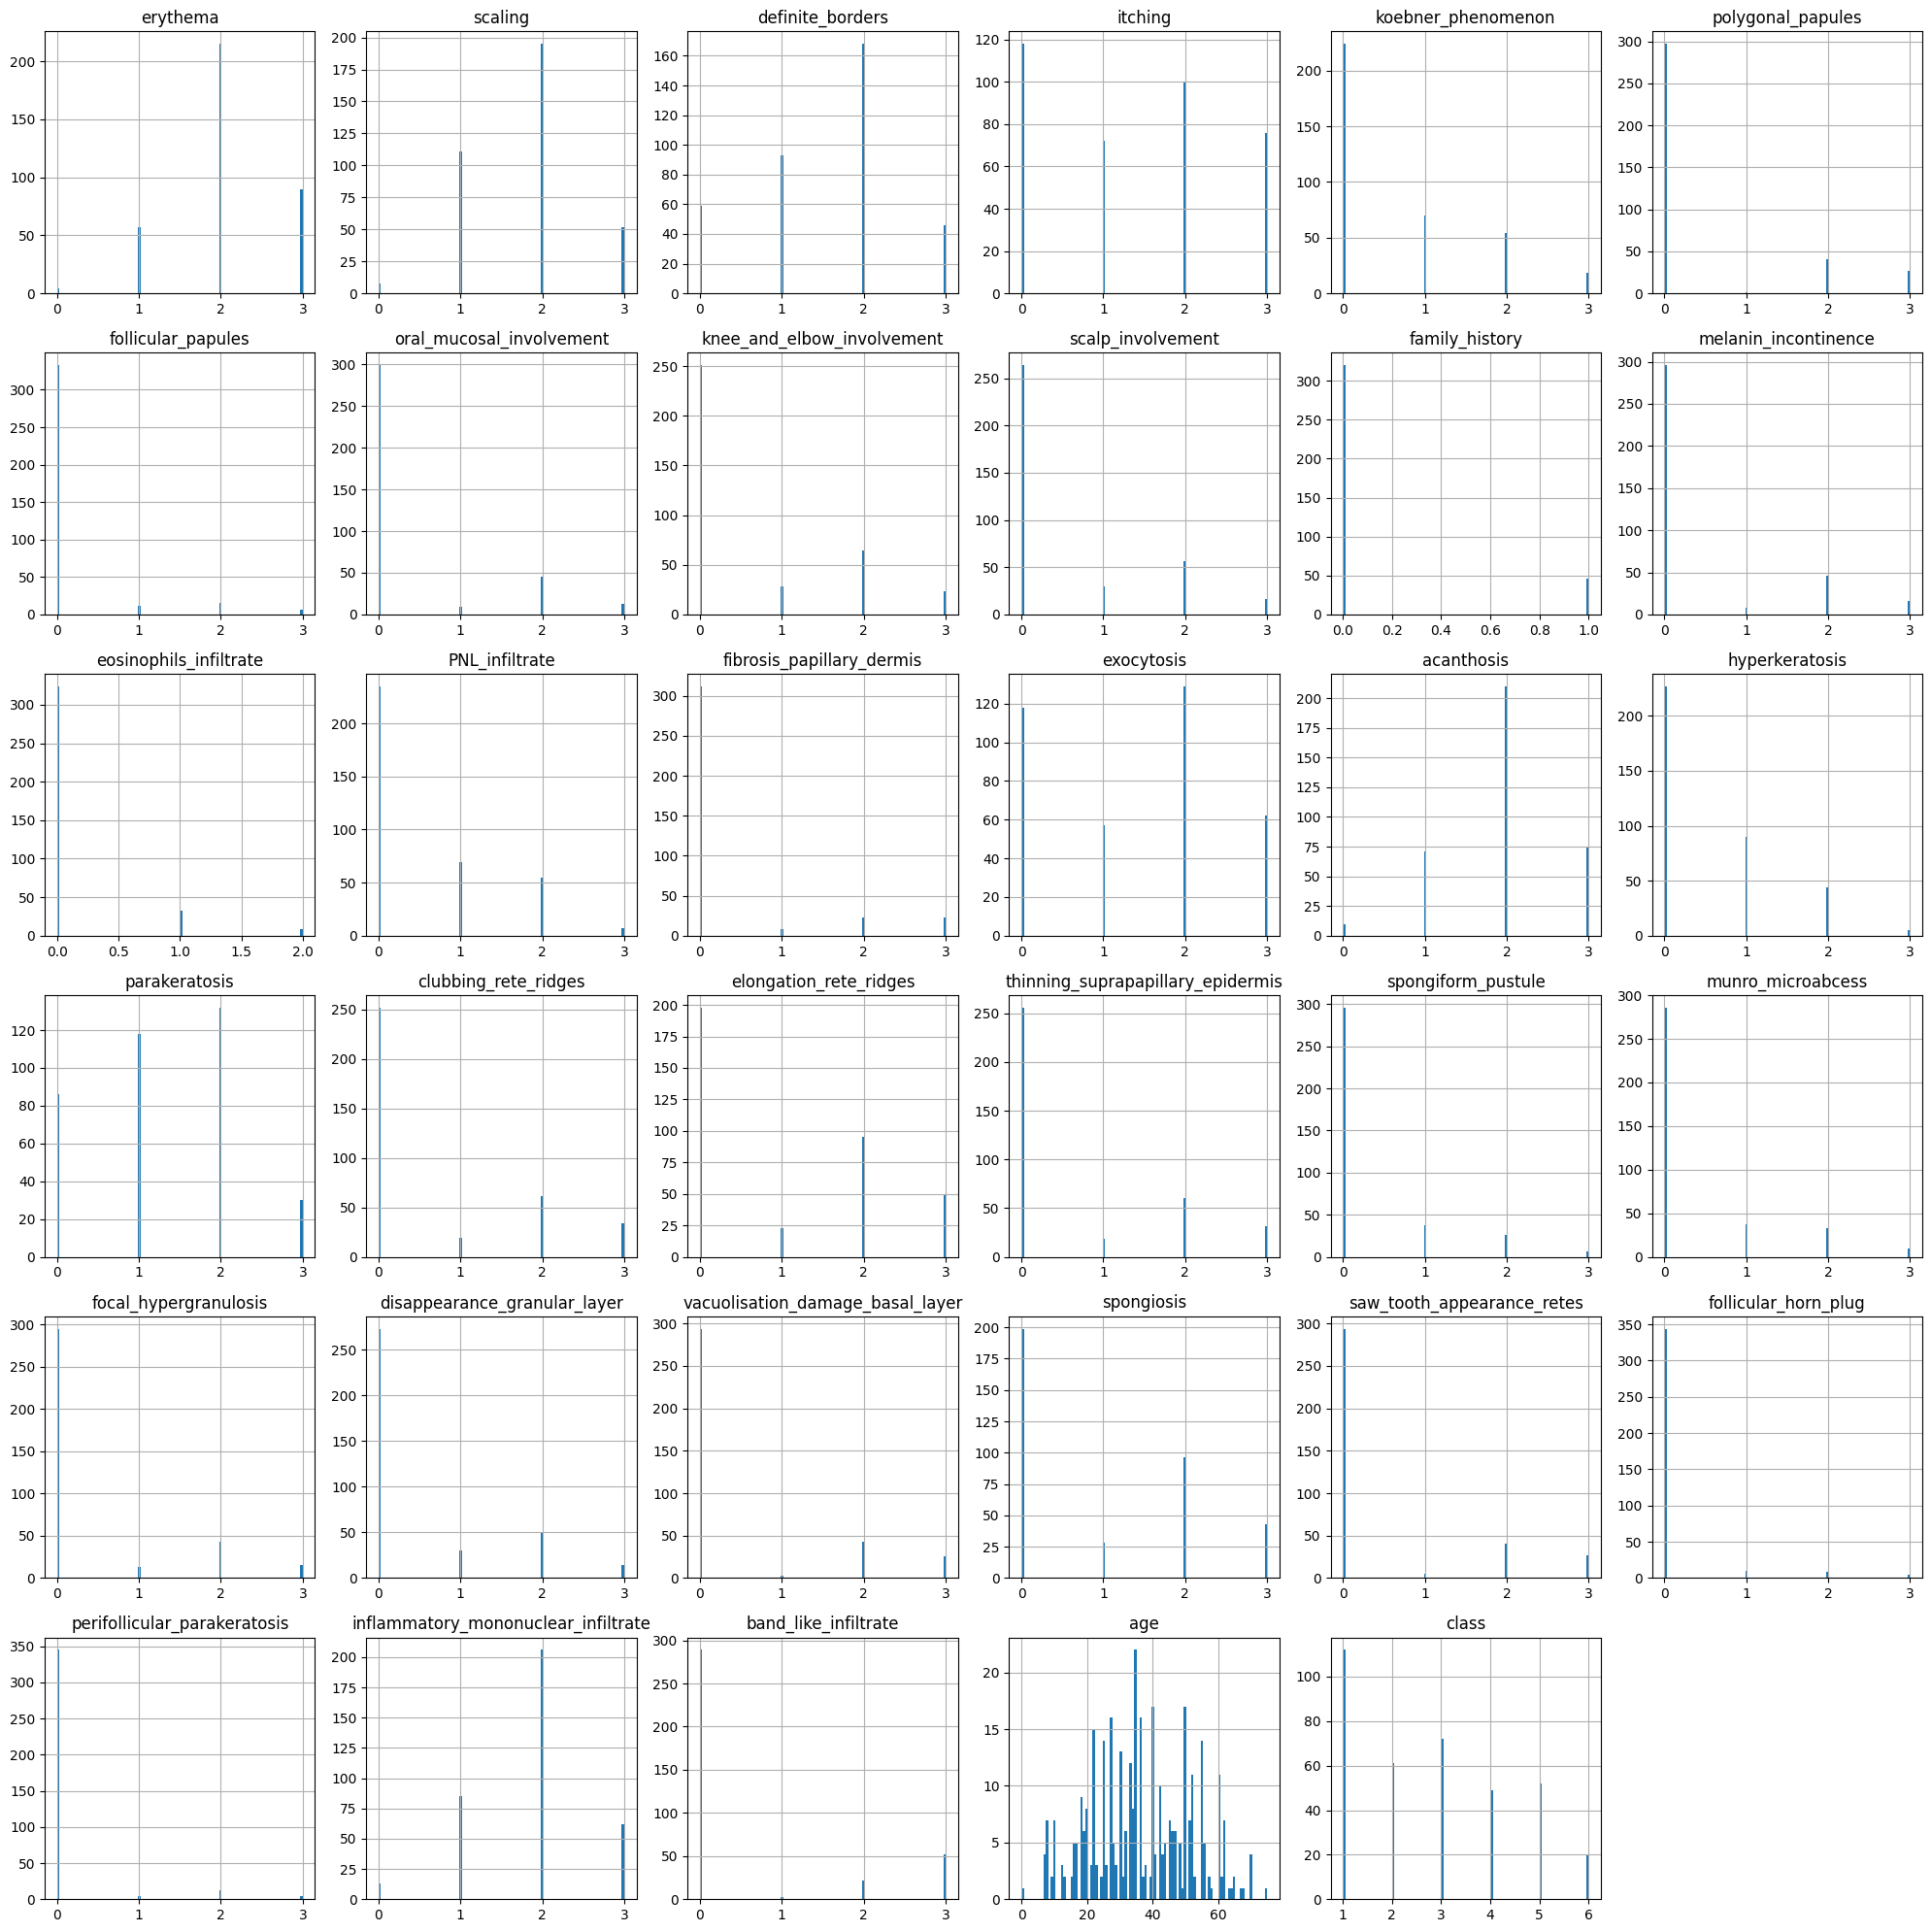

In [19]:
Plot histograms for each column
data.hist(figsize=(20, 20), bins=100)
plt.tight_layout()
plt.show()